<a href="https://colab.research.google.com/github/francis-mujani/appareil-connectes-update/blob/master/dataset_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


In [0]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [0]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
 - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

SyntaxError: ignored

In [0]:
# Dimension of the dataset
print(np.shape(boston))

(506, 13)
ERROR! Session/line number was not unique in database. History logging moved to new session 67


In [0]:
# Let's summarize the data to see the distribution of data
print(boston.describe())

             CRIM          ZN       INDUS  ...     PTRATIO           B       LSTAT
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534  356.674032   12.653063
std      8.601545   23.322453    6.860353  ...    2.164946   91.294864    7.141062
min      0.006320    0.000000    0.460000  ...   12.600000    0.320000    1.730000
25%      0.082045    0.000000    5.190000  ...   17.400000  375.377500    6.950000
50%      0.256510    0.000000    9.690000  ...   19.050000  391.440000   11.360000
75%      3.677083   12.500000   18.100000  ...   20.200000  396.225000   16.955000
max     88.976200  100.000000   27.740000  ...   22.000000  396.900000   37.970000

[8 rows x 13 columns]


In [0]:
boston['MEDV'] = boston_dataset.target

In [0]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [0]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [0]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


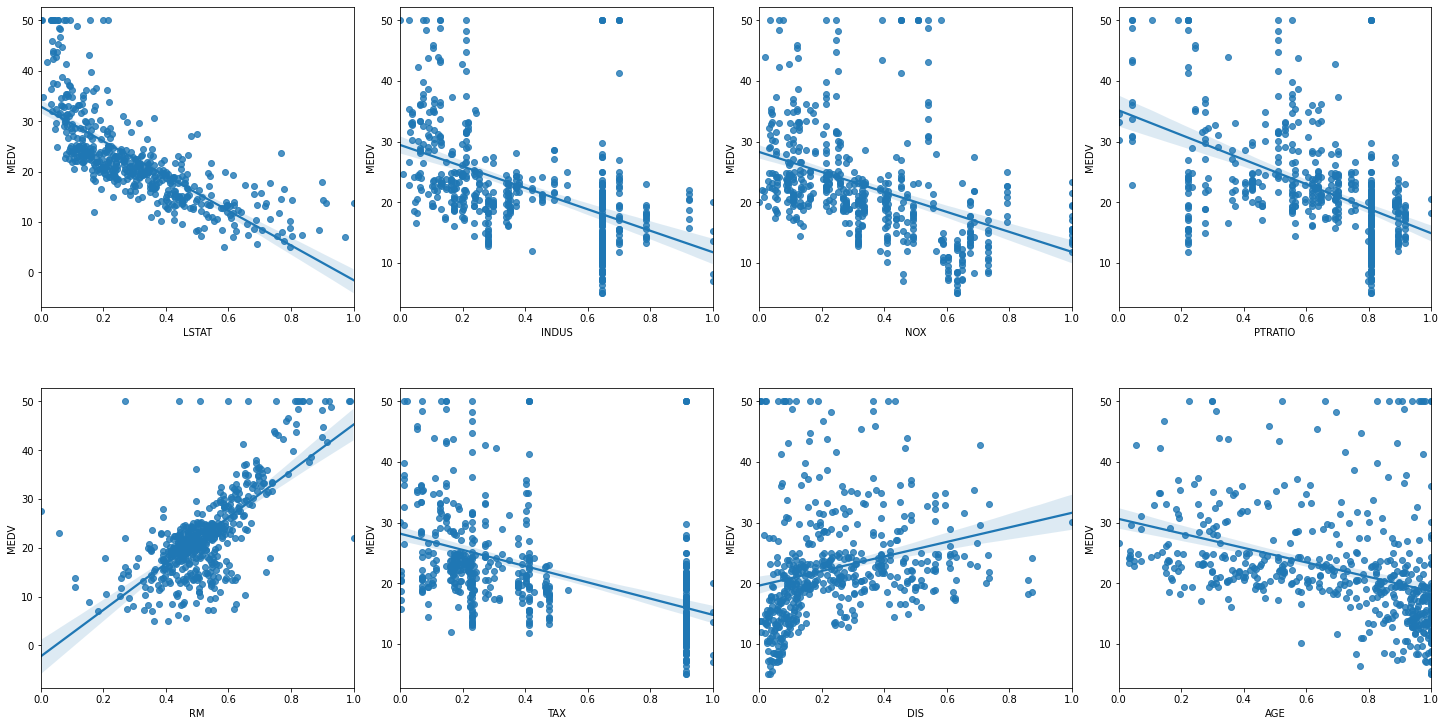

In [0]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston.loc[:,column_sels]
y = boston['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [0]:
x = boston['RM']
y = boston['MEDV']

In [0]:
print(x.shape)
print(y.shape)

(506,)
(506,)


In [0]:
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [0]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [0]:
# # initialiser les theta0 et theta1

# theta_0 = np.zeros(1)
# theta_0

In [0]:
x = x.values.reshape(506,1)
y = y.values.reshape(506,1)

In [0]:
x.shape
y.shape

(506, 1)

In [0]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(506, 2)

In [0]:
theta0 = np.random.randn(2, 1)
print(theta0)
print(theta0.shape)

[[-1.04764688]
 [ 0.87720817]]
(2, 1)


In [0]:
theta_1 = np.ones((1))
theta_1

array([1.])

In [0]:
# creation de la fonction model

def predict(x, theta_0):
  return X.dot(theta0) 

predict(X, theta_0)

array([[-6.01107007],
       [-5.84973245],
       [-6.65013467],
       [-6.4542247 ],
       [-6.61032408],
       [-5.85916127],
       [-5.42124487],
       [-5.58886838],
       [-5.02209141],
       [-5.4128637 ],
       [-5.80363599],
       [-5.41810193],
       [-5.29238431],
       [-5.35524312],
       [-5.50924721],
       [-5.23476373],
       [-5.34057606],
       [-5.39819664],
       [-4.83875321],
       [-5.12266551],
       [-4.95818495],
       [-5.37200547],
       [-5.55743897],
       [-5.21276315],
       [-5.32905195],
       [-4.98856671],
       [-5.21276315],
       [-5.45791252],
       [-5.92725832],
       [-6.11478711],
       [-5.10799846],
       [-5.48410369],
       [-5.35629077],
       [-5.09542669],
       [-5.50924721],
       [-5.33848077],
       [-5.24209726],
       [-5.25152608],
       [-5.37305312],
       [-6.03202301],
       [-6.48146352],
       [-6.21536121],
       [-5.58572544],
       [-5.6297266 ],
       [-5.48096075],
       [-5

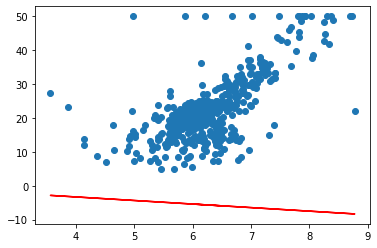

In [0]:
plt.scatter(x, y)
plt.plot(x, predict(X, theta), c ='r')

# Nouvelle section